## Models of Stock Return

In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [30]:
matplotlib.__version__

'2.0.2'

In [2]:
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Distribution of Log return

In [3]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

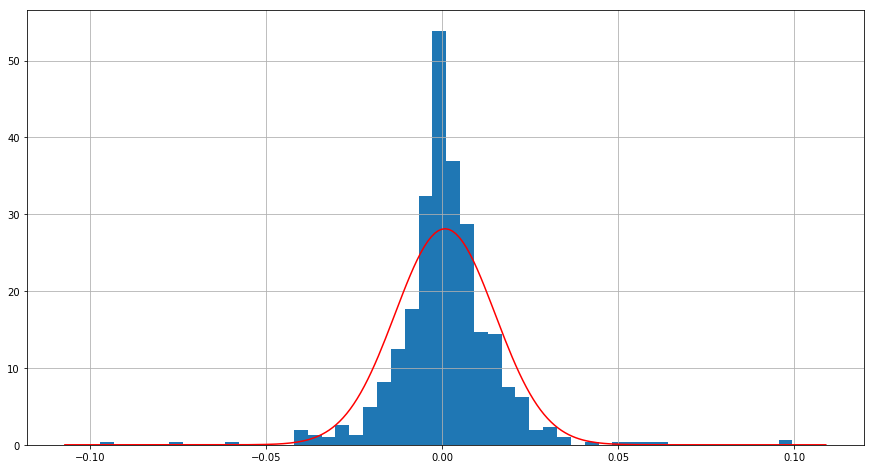

In [21]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, normed=True, figsize=(15, 8)) # matplotlib is 2.0.2 (old!) here, so `normed` instead of `density`
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [22]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.000171184826087


In [23]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  6.05677563486e-13


**Expected Output: ** The Probability is  6.05677563486e-13

## Calculate the probability of the stock price will drop over a certain percentage in a year

In [7]:
# drop over 40% in 220 days
mu220 = 220 * mu
sigma220 = (220 ** 0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.00291236331333


In [32]:
# drop over 20% in 220 days
mu220 = 220 * mu
sigma220 = (220 ** 0.5) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.0353523772749


**Expected Output: ** The probability of dropping over 20% in 220 days is  0.0353523772749

## Calculate Value at risk (VaR)

In [33]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.0225233624071


In [34]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.0225233624071
95% quantile  0.0241638253793


In [35]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.00875205783841
75% quantile  0.0103925208107


**Expected Output: ** 25% quantile  -0.00875205783841
75% quantile  0.0103925208107